In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
Qcc_FI = pd.read_csv('Qcc_quant_after_FI.csv')

In [4]:
Qcc_quant = pd.read_csv('Qcc_quant.csv')

In [5]:
TD = pd.read_csv('TD.csv')
TD

,Project,SonarQube_debt,Codiga_debt,CodeClimate_debt
0,ant-1.8,1431.033333,677.56,5595.5
1,antlr-3,934.400000,737.00,5701.4
2,aoi-2.8,1606.300000,702.66,10842.6
3,argouml,2277.266667,992.36,11998.6
4,aspectj,6653.583333,3144.50,67848.8
5,axion-1,320.850000,197.36,1562.4
6,azureus,5155.616667,2916.10,30520.2
7,batik-1,2999.200000,1436.56,12370.0
8,castor-,21213.083330,1155.66,5376.4
9,cayenne,2877.066667,830.26,10111.4


In [6]:
X = Qcc_quant.copy()

## Z stand

In [7]:
def big_data_pipe(data):
    data.iloc[:,2:] = data.iloc[:,2:].apply(stats.zscore)
    return data.iloc[:,2:]

In [8]:
def td_data_pipe(data):
    data = data.to_frame()
    data = data.iloc[:,0:].apply(stats.zscore)
    data = data.iloc[:,0]
    return data

In [9]:
X = big_data_pipe(X)

In [10]:
X = X.fillna(0.0)

In [11]:
X

,NOP,TLOC,LCOM_01,LCOM_20,LCOM_40,LCOM_50,LCOM_60,LCOM_80,LCOM_99,LCOM_std,DIT_01,DIT_20,DIT_40,DIT_50,DIT_60,DIT_80,DIT_99,DIT_std,CE_01,CE_20,CE_40,CE_50,CE_60,CE_80,CE_99,CE_std,RMI_01,RMI_20,RMI_40,RMI_50,RMI_60,RMI_80,RMI_99,RMI_std,NOM_01,NOM_20,NOM_40,NOM_50,NOM_60,NOM_80,NOM_99,NOM_std,NSF_01,NSF_20,NSF_40,NSF_50,NSF_60,NSF_80,NSF_99,NSF_std,NSM_01,NSM_20,NSM_40,NSM_50,NSM_60,NSM_80,NSM_99,NSM_std,NBD_01,NBD_20,NBD_40,NBD_50,NBD_60,NBD_80,NBD_99,NBD_std,SIX_01,SIX_20,SIX_40,SIX_50,SIX_60,SIX_80,SIX_99,SIX_std,CA_01,CA_20,CA_40,CA_50,CA_60,CA_80,CA_99,CA_std,NOI_01,NOI_20,NOI_40,NOI_50,NOI_60,NOI_80,NOI_99,NOI_std,PAR_01,PAR_20,PAR_40,PAR_50,PAR_60,PAR_80,PAR_99,PAR_std,WMC_01,WMC_20,WMC_40,WMC_50,WMC_60,WMC_80,WMC_99,WMC_std,NOC_01,NOC_20,NOC_40,NOC_50,NOC_60,NOC_80,NOC_99,NOC_std,RMA_01,RMA_20,RMA_40,RMA_50,RMA_60,RMA_80,RMA_99,RMA_std,NORM_01,NORM_20,NORM_40,NORM_50,NORM_60,NORM_80,NORM_99,NORM_std,MLOC_01,MLOC_20,MLOC_40,MLOC_50,MLOC_60,MLOC_80,MLOC_99,MLOC_std,NSC_01,NSC_20,NSC_40,NSC_50,NSC_60,NSC_80,NSC_99,NSC_std,RMD_01,RMD_20,RMD_40,RMD_50,RMD_60,RMD_80,RMD_99,RMD_std,NOF_01,NOF_20,NOF_40,NOF_50,NOF_60,NOF_80,NOF_99,NOF_std,VG_01,VG_20,VG_40,VG_50,VG_60,VG_80,VG_99,VG_std
0,0.047882,0.017156,0.0,0.0,-0.113430,-0.134788,-0.281811,0.955654,-0.059180,0.886492,-0.144558,-0.010041,1.117009,0.474045,1.163153,0.865576,-0.689943,-0.121007,-0.512781,-0.469169,-0.516022,-0.760158,-0.496359,-0.225240,0.282777,0.108222,-0.398292,2.123855,2.499544,1.830174,1.335884,0.641833,0.272557,-0.944366,-0.251581,-0.340104,0.563813,0.524737,0.373818,0.738699,-0.173156,0.886492,0.0,0.0,-0.195180,-0.287718,-0.424859,0.165816,-0.193724,-0.338010,0.0,0.0,0.0,-0.096225,-0.211187,-0.501133,-0.113386,-0.424676,-0.195180,0.0,0.0,0.0,-0.219265,0.155671,-0.076349,-0.084378,0.0,0.0,-0.113282,-0.146806,0.279376,0.334508,-0.091754,-0.205782,-0.293431,-0.669289,-1.030049,-1.026437,-1.110523,-0.921241,0.607806,0.465839,-0.096225,-0.135318,-0.296366,-0.377927,-0.605035,-0.412784,-0.285614,-0.393138,0.0,-0.096225,-0.761387,0.429863,0.109254,-0.908408,-0.721852,-0.841577,-0.538217,0.087862,0.326758,0.318520,0.361195,0.381327,-0.182896,-0.299676,-0.137084,-0.888460,-0.732332,-0.724140,-0.655129,-0.403369,0.089454,0.127308,-0.100390,-0.244242,-0.455090,-0.642227,-0.420950,-0.522873,-0.507635,-0.831752,0.0,0.0,-0.136717,-0.195180,2.507288,0.271623,-0.261642,-0.331487,0.0,0.055385,-0.416804,-0.877833,-0.347046,-0.667004,-0.373631,-0.675019,0.0,0.0,0.0,0.0,0.0,-0.490808,0.525123,0.041753,-0.221080,-0.642751,-1.409054,-1.876838,-1.755858,-1.606834,-0.278354,-0.842158,0.0,-0.136717,-0.354501,0.868685,-0.022582,0.664644,-0.067382,-0.278644,0.0,0.0,-0.096225,-0.096225,-0.387374,-0.627660,-0.239726,-0.478740
1,-0.530225,-0.464756,0.0,0.0,-0.113430,-0.134788,-0.281811,0.302866,0.111992,0.197879,-0.144558,-0.010041,-0.497765,0.474045,-0.079824,-0.121325,-0.154658,-0.619791,-0.177352,-0.469169,-0.516022,-0.416352,0.055714,0.460820,-0.241666,-0.122845,0.207981,-0.288096,-0.512695,-0.664130,-0.062766,0.641833,0.272557,0.800871,-0.251581,-0.340104,-0.342612,0.524737,0.373818,1.738510,0.037117,0.197879,0.0,0.0,-0.195180,-0.287718,-0.424859,-0.872918,-0.104096,0.093203,0.0,0.0,0.0,-0.096225,-0.211187,-0.501133,-0.457969,-0.117883,-0.195180,0.0,0.0,0.0,-0.219265,0.155671,-0.076349,-0.479296,0.0,0.0,-0.113282,-0.146806,-0.235717,-0.198565,-0.091754,0.088207,-0.293431,-0.669289,0.120313,-0.237427,0.348314,0.392434,-0.562680,-0.500037,-0.096225,-0.135318,-0.296366,-0.377927,-0.055462,-0.277262,-0.512997,-0.433198,0.0,-0.096225,-0.761387,-2.326320,0.109254,-0.908408,0.052652,-0.283925,-0.538217,-0.869833,-0.115136,-0.315611,0.122298,1.075565,-0.115130,-0.140458,-0.877792,-0.528452,0.938532,1.241769,1.314149,1.229471,-0.260136,-0.135612,-0.100390,-0.244242,-0.353323,0.041658,-0.091522,-0.652484,-1.738068,-1.551873,0.0,0.0,-0.136717,-0.195180,-0.339529,0.271623,0.342020,0.515567,0.0,0.055385,1.648271,2.802311,2.158119,1.206796,-0.204380,-0.578415,0.0,0.0,0.0,0.0,0.0,-0.490808,

In [12]:
y1 = td_data_pipe(TD['SonarQube_debt'])

In [13]:
y2 = td_data_pipe(TD['Codiga_debt'])

In [14]:
y3 = td_data_pipe(TD['CodeClimate_debt'])

In [15]:
pca = PCA()

In [16]:
pca.fit(X)

PCA()

In [17]:
test =pca.explained_variance_ratio_

In [18]:
print(test)

[1.35389535e-01 1.07131071e-01 7.92900049e-02 6.33402332e-02
 6.04310407e-02 4.70782407e-02 3.93461928e-02 3.72835699e-02
 3.15925389e-02 2.91635574e-02 2.36877769e-02 2.22083824e-02
 2.13456570e-02 2.01240899e-02 1.82214731e-02 1.54828354e-02
 1.49143712e-02 1.36339957e-02 1.33117549e-02 1.29149518e-02
 1.11987858e-02 1.00402190e-02 9.39796464e-03 9.22863573e-03
 8.70819534e-03 8.37364992e-03 7.74682615e-03 7.65043922e-03
 6.70894214e-03 6.19562362e-03 5.91957986e-03 5.78033121e-03
 5.51324922e-03 5.20380796e-03 4.95015321e-03 4.39783736e-03
 4.27488288e-03 4.16546812e-03 3.83970616e-03 3.67730158e-03
 3.32054202e-03 3.09069185e-03 2.95085222e-03 2.80722533e-03
 2.68300430e-03 2.61010125e-03 2.50440346e-03 2.31995206e-03
 2.20561039e-03 2.16816575e-03 1.98748607e-03 1.92982110e-03
 1.85484432e-03 1.75006098e-03 1.57958785e-03 1.50899721e-03
 1.45709147e-03 1.33178812e-03 1.29858719e-03 1.23127641e-03
 1.20141612e-03 1.14387485e-03 1.09456274e-03 1.04499759e-03
 9.73345730e-04 9.366410

In [19]:
model = PCA().fit(X)
# X_pc = model.transform(X)

In [20]:
n_pcs= model.components_.shape[0]
n_pcs

109

In [21]:
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

In [22]:
initial_feature_names = list(X.columns)

In [23]:
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [24]:
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

In [25]:
df = pd.DataFrame(dic.items())

In [26]:
df

,0,1
0,PC0,CE_60
1,PC1,LCOM_std
2,PC2,RMI_20
3,PC3,NOC_99
4,PC4,LCOM_40
5,PC5,NOI_60
6,PC6,NOM_20
7,PC7,SIX_50
8,PC8,NSM_50
9,PC9,NOM_99


In [27]:
exp_var_pca = model.explained_variance_ratio_

In [28]:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

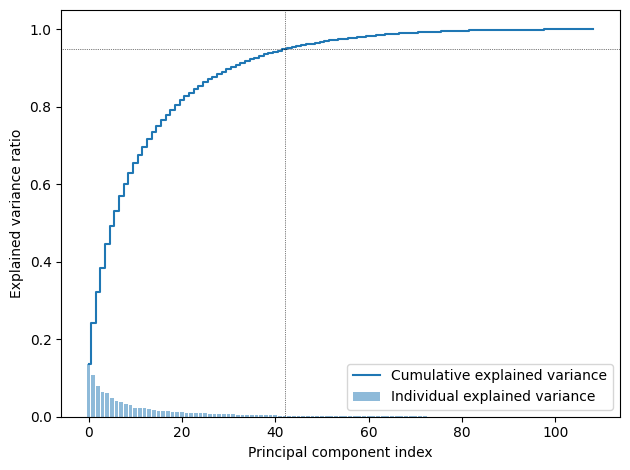

In [29]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.axhline(y=0.95, color='k', linestyle=':',linewidth=.5)
plt.axvline(x=42, color='k', linestyle=':',linewidth=.5)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [30]:
new_df = Qcc_quant[list(df.head(42)[1].unique())]

In [31]:
new_df.insert(loc=0, column='Project', value=Qcc_quant['Project'])
new_df.insert(loc=1, column='Domain', value=Qcc_quant['Domain'])

In [32]:
new_df

,Project,Domain,CE_60,LCOM_std,RMI_20,NOC_99,LCOM_40,NOI_60,NOM_20,SIX_50,NSM_50,NOM_99,MLOC_40,DIT_01,RMI_std,LCOM_60,NOI_50,NSF_99,RMD_01,WMC_01,NSM_80,NSM_99,MLOC_20,NOF_std,PAR_99,NSM_std,PAR_20,RMA_80,NSC_std,DIT_60,PAR_40,NOI_80,DIT_20,NORM_80,NSC_99,PAR_80
0,ant-1.8,parsers/generators/make,4.0,0.349370,0.5710,105.74,0.0,0.0,1.0,0.000,0.0,46.81,1.0,0.00,0.313510,0.0000,0.0,14.00,0.00000,0.00,0.0,8.81,1.0,4.528603,4.00,1.712138,0.0,0.1726,6.027298,3.0,0.0,1.0,1.0,1.0,13.00,1.0
1,antlr-3,parsers/generators/make,6.0,0.315929,0.1822,62.63,0.0,0.4,1.0,0.000,0.0,57.42,2.0,0.00,0.379568,0.0000,0.0,16.71,0.00000,0.00,0.0,6.71,1.0,5.267432,5.00,2.642318,0.0,0.1560,10.178750,2.0,0.0,1.2,1.0,1.0,26.62,1.0
2,aoi-2.8,3D/graphics/media,15.0,0.332304,0.1564,89.16,0.0,1.0,1.0,0.000,0.0,44.00,2.0,0.00,0.381112,0.3330,1.0,14.77,0.00000,0.00,0.0,14.36,1.0,7.041553,8.00,2.600284,0.0,0.1532,2.533198,2.0,1.0,2.6,1.0,1.0,9.00,2.0
3,argouml,diagram generator/data visualization,7.0,0.259259,0.1076,124.38,0.0,0.0,1.0,0.000,0.0,38.00,1.0,0.00,0.311233,0.0000,0.0,11.32,0.00000,0.00,0.0,8.00,1.0,2.960077,4.00,1.651395,0.0,0.2462,4.148885,3.0,0.0,2.0,1.0,1.0,10.32,1.0
4,aspectj,programming language,9.0,0.326315,0.0992,149.96,0.0,2.0,1.0,0.000,0.0,87.80,1.0,0.00,0.328175,0.0000,1.0,30.00,0.00000,0.00,1.0,20.00,1.0,11.678051,6.00,5.131094,0.0,0.4056,2.401764,2.0,1.0,5.0,1.0,2.0,11.00,2.0
5,axion-1,database,14.6,0.306648,0.3152,52.28,0.0,2.0,3.0,0.000,0.0,110.80,1.0,0.00,0.247291,0.0000,0.0,6.40,0.00024,0.60,0.0,2.40,1.0,6.421163,4.00,0.656936,0.0,0.3286,2.535885,2.0,0.0,3.0,1.0,1.0,15.40,1.0
6,azureus,database,4.0,0.268863,0.1092,53.16,0.0,1.0,1.0,0.000,0.0,49.00,1.0,0.00,0.312088,0.0000,0.0,17.00,0.00000,1.00,0.0,8.00,0.0,4.344592,5.00,2.659267,0.0,0.6670,7.841715,1.0,0.0,3.0,1.0,0.0,10.00,2.0
7,batik-1,3D/graphics/media,6.0,0.289172,0.2314,222.51,0.0,1.0,1.0,0.000,0.0,38.00,1.0,0.00,0.372324,0.0000,0.0,17.45,0.00000,0.00,0.0,6.00,1.0,17.915906,7.00,1.605654,0.0,0.3602,3.614894,2.0,0.0,4.0,1.0,1.0,13.00,2.0
8,castor-,middleware,4.0,0.347795,0.4220,52.40,0.0,0.0,2.0,0.000,0.0,47.00,1.0,0.00,0.337089,0.0000,0.0,13.00,0.00000,0.00,0.0,5.00,1.0,3.834892,4.00,1.203057,0.0,0.1250,3.618347,3.0,0.0,0.0,1.0,2.0,8.00,1.0
9,cayenne,database,6.0,0.273629,0.2490,99.27,0.0,0.0,1.0,0.000,0.0,33.00,1.0,0.00,0.340656,0.0000,0.0,7.00,0.00000,0.00,0.0,4.00,1.0,2.453224,4.00,1.328170,0.0,0.1688,5.206185,3.0,0.0,0.2,1.0,1.0,12.00,1.0


In [33]:
print(new_df.columns)

Index(['Project', 'Domain', 'CE_60', 'LCOM_std', 'RMI_20', 'NOC_99', 'LCOM_40',
       'NOI_60', 'NOM_20', 'SIX_50', 'NSM_50', 'NOM_99', 'MLOC_40', 'DIT_01',
       'RMI_std', 'LCOM_60', 'NOI_50', 'NSF_99', 'RMD_01', 'WMC_01', 'NSM_80',
       'NSM_99', 'MLOC_20', 'NOF_std', 'PAR_99', 'NSM_std', 'PAR_20', 'RMA_80',
       'NSC_std', 'DIT_60', 'PAR_40', 'NOI_80', 'DIT_20', 'NORM_80', 'NSC_99',
       'PAR_80'],
      dtype='object')


In [34]:
new_df.to_csv('PCA.csv',index=False)